In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy.sparse as sparse
import pandas as pd
from itertools import count

## Visualize an adjacency matrix

In [2]:
graph = nx.Graph()

In [3]:
graph.clear()

node_list = [1,2,3,4]
graph.add_nodes_from(node_list)

graph.add_edges_from([(1,2), (2,3), (3,4), (4,1)])
graph.add_edge(1,1)
graph.add_edge(2,4)

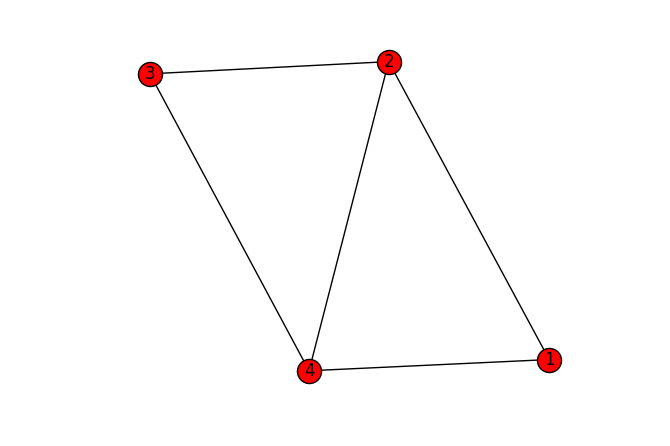

In [4]:
nx.draw(graph, with_labels=True)
plt.show()

In [5]:
for i in node_list:
    print('node', i, 'adjacencies: ', graph.adj[i])

node 1 adjacencies:  {1: {}, 2: {}, 4: {}}
node 2 adjacencies:  {1: {}, 3: {}, 4: {}}
node 3 adjacencies:  {2: {}, 4: {}}
node 4 adjacencies:  {1: {}, 2: {}, 3: {}}


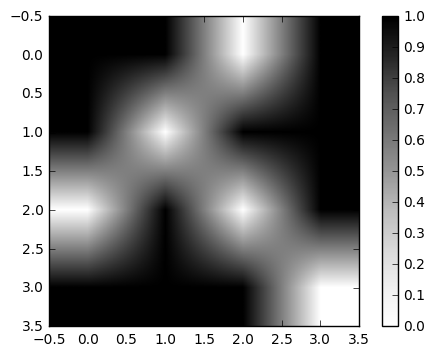

In [6]:
adj_img = sparse.csr_matrix.todense(nx.adjacency_matrix(graph))

plt.imshow(adj_img, cmap='Greys')
plt.colorbar()
plt.show()

So because an adjacency matrix is just an image, we can attempt to use machine learning to classify the content it describes.

## Munge 3980

In [7]:
edges = pd.read_csv('../dat/facebook/3980.edges', sep=' ', skiprows=0, header=None, names=['node1','node2'])
edges.head()

,node1,node2
0,4038,4014
1,4032,4027
2,4019,4026
3,4023,4003
4,4018,3997


In [8]:
nodes = pd.read_csv('../dat/facebook/3980.feat', sep=' ', skiprows=0, header=None, names=range(43))
nodes.drop(range(1,18), axis=1, inplace=True)
nodes.drop(range(19,43), axis=1, inplace=True)
nodes.head()

,0,18
0,3981,0
1,3982,0
2,3983,0
3,3984,0
4,3985,0


In [9]:
graph.clear()

graph.add_node(3980, gender=0)

for i in range(nodes.shape[0]):
    graph.add_node(nodes[0].iloc[i], gender=nodes[18].iloc[i])

for i in range(edges.shape[0]):
    graph.add_edge(edges['node1'].iloc[i], edges['node2'].iloc[i])
    
for i in list(graph.nodes):
    graph.add_edge(3980, i)

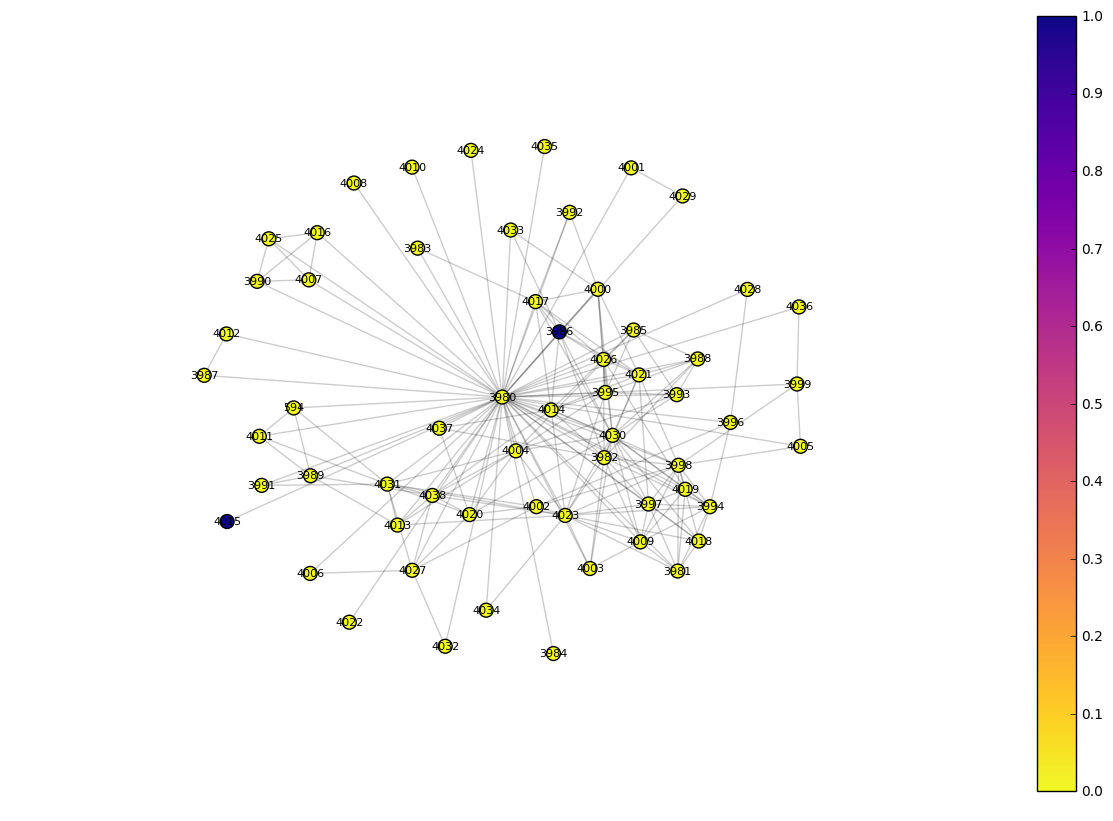

In [10]:
plt.figure(figsize=(15,10))
pos = nx.spring_layout(graph)

groups = set(nx.get_node_attributes(graph, 'gender').values())
mapping = dict(zip(sorted(groups),count()))
nodes = graph.nodes()
colors = [mapping[graph.node[n]['gender']] for n in nodes]

nx.draw_networkx_labels(graph, pos, font_size=8)

nc = nx.draw_networkx_nodes(graph, pos, nodelist=nodes, node_color=colors, with_labels=True,
                            node_size=100, cmap='plasma_r')
ec = nx.draw_networkx_edges(graph, pos, alpha=0.2)

plt.colorbar(nc)
plt.axis('off')
plt.show()

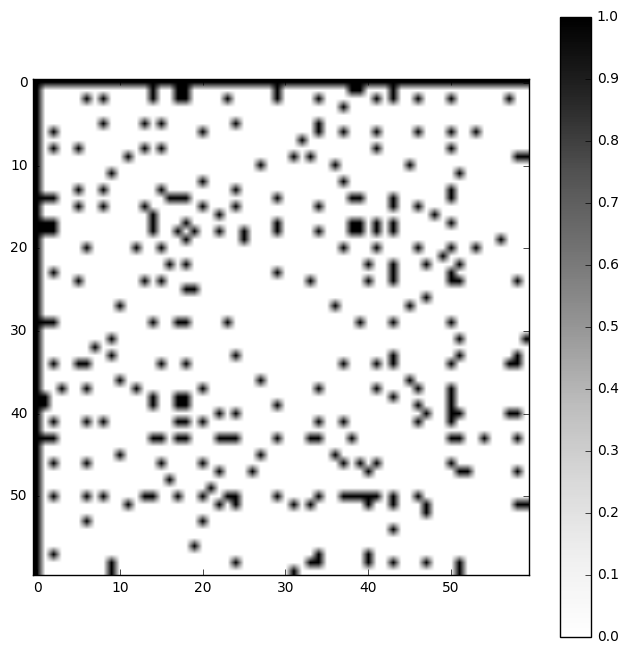

In [11]:
adj_img = sparse.csr_matrix.todense(nx.adjacency_matrix(graph))

plt.figure(figsize=(8,8))
plt.imshow(adj_img, cmap='Greys')
plt.colorbar()
plt.show()

In [12]:
adj_img.shape

(60, 60)

## Munge 1912

In [13]:
edges = pd.read_csv('../dat/facebook/1912.edges', sep=' ', skiprows=0, header=None, names=['node1','node2'])
edges.head()

,node1,node2
0,2290,2363
1,2346,2025
2,2140,2428
3,2201,2506
4,2425,2557


Which columns represent gender?

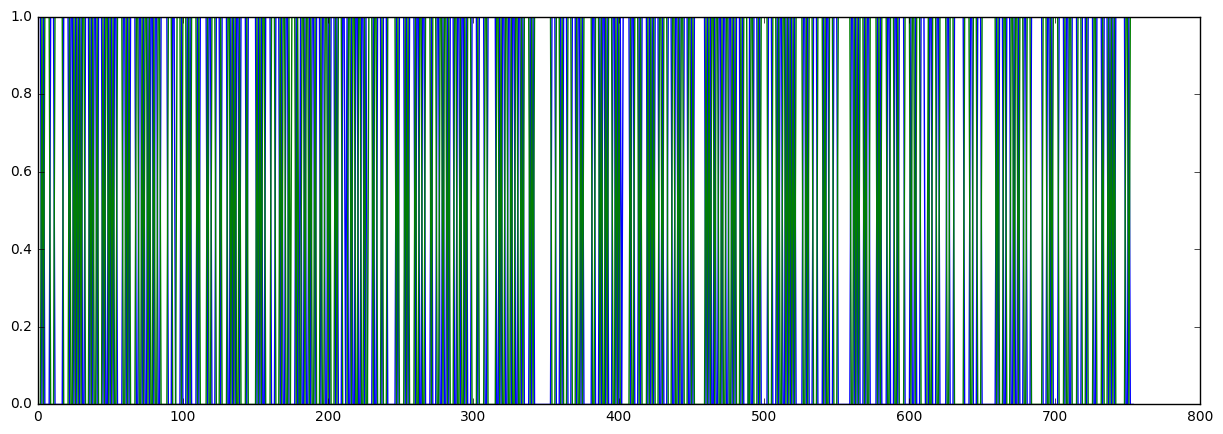

In [14]:
nodes = pd.read_csv('../dat/facebook/1912.feat', sep=' ', skiprows=0, header=None, names=range(481))

plt.figure(figsize=(15,5))
plt.plot(nodes[261])
plt.plot(nodes[260])
plt.show()

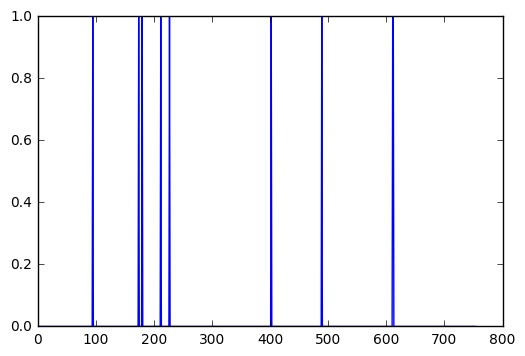

In [15]:
diff = np.zeros(nodes.shape[0])
diff.fill(2)

for i in range(nodes.shape[0]):
    if nodes[260].iloc[i] == nodes[261].iloc[i]:
        diff[i] = 1
    else:
        diff[i] = 0
        
plt.plot(diff)
plt.show()

In [16]:
np.nonzero(diff)

(array([ 95, 174, 180, 212, 227, 402, 489, 611, 612]),)

Okay, so it's columns 260 and 261 which are the gender coordinates.

In [17]:
nodes = pd.read_csv('../dat/facebook/1912.feat', sep=' ', skiprows=0, header=None, names=range(481))
nodes.drop(range(1,260), axis=1, inplace=True)
nodes.drop(range(261,481), axis=1, inplace=True)
nodes.head()

,0,260
0,1913,0
1,1914,0
2,1915,0
3,1916,1
4,1917,0


In [18]:
graph.clear()

graph.add_node(1912, gender=0)

for i in range(nodes.shape[0]):
    graph.add_node(nodes[0].iloc[i], gender=nodes[260].iloc[i])

for i in range(edges.shape[0]):
    graph.add_edge(edges['node1'].iloc[i], edges['node2'].iloc[i])
    
for i in list(graph.nodes):
    graph.add_edge(1912, i)

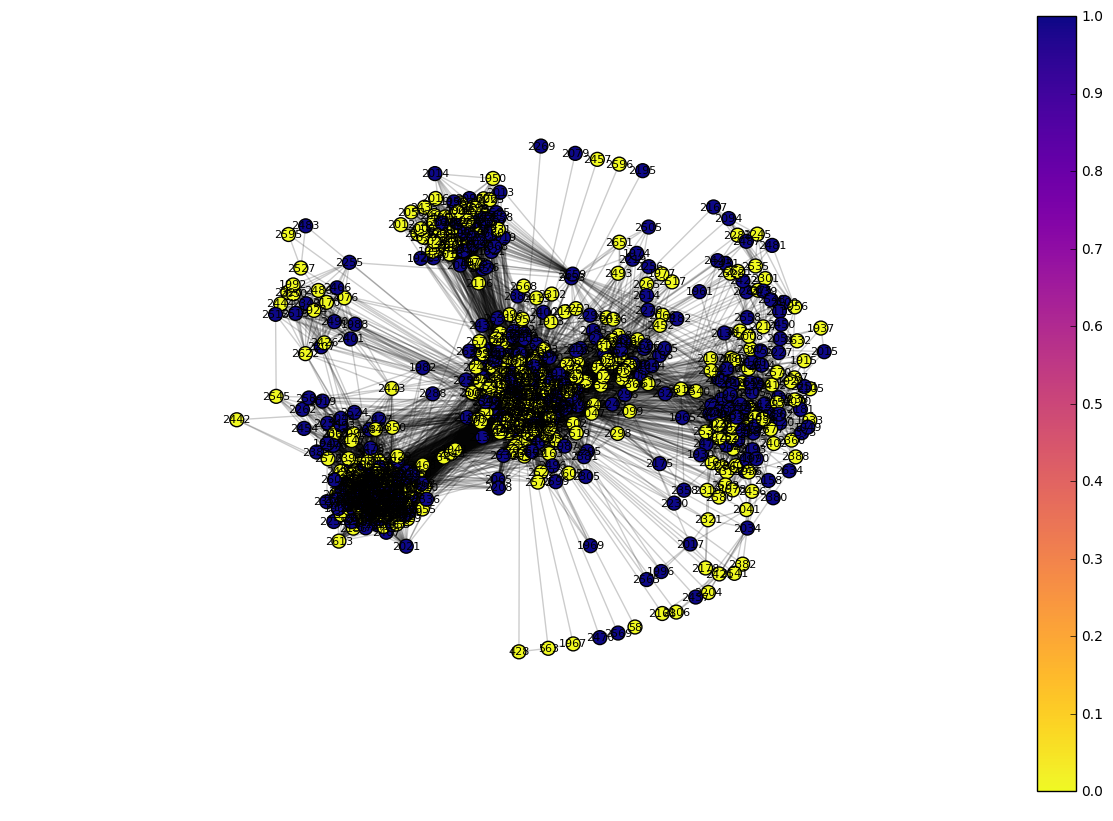

CPU times: user 8.11 s, sys: 1.1 s, total: 9.21 s
Wall time: 8 s


In [19]:
%%time

plt.figure(figsize=(15,10))
pos = nx.spring_layout(graph)

groups = set(nx.get_node_attributes(graph, 'gender').values())
mapping = dict(zip(sorted(groups),count()))
noodes = graph.nodes()
colors = [mapping[graph.node[n]['gender']] for n in noodes]

nx.draw_networkx_labels(graph, pos, font_size=8)

nc = nx.draw_networkx_nodes(graph, pos, nodelist=noodes, node_color=colors, with_labels=True,
                            node_size=100, cmap='plasma_r')
ec = nx.draw_networkx_edges(graph, pos, alpha=0.2)

plt.colorbar(nc)
plt.axis('off')
plt.show()

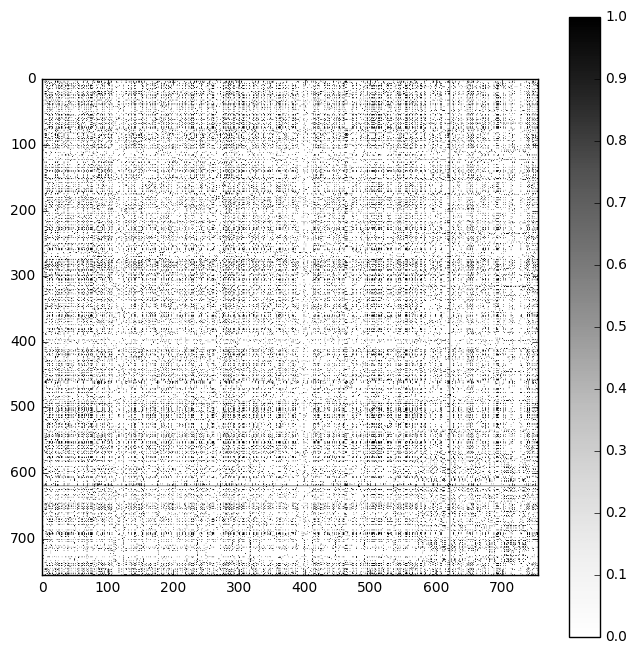

In [20]:
adj_img = sparse.csr_matrix.todense(nx.adjacency_matrix(graph))

plt.figure(figsize=(8,8))
plt.imshow(adj_img, cmap='Greys')
plt.colorbar()
plt.show()

In [21]:
adj_img.shape

(756, 756)

## Build Ftr Vects

In [22]:
oneD = np.ravel(adj_img)

In [23]:
traindat = np.zeros((nodes.shape[0], oneD.shape[0] + 1))

for i in range(nodes.shape[0]):
    traindat[i, 0] = i
    traindat[i, 1:] = oneD

In [24]:
trainlbl = np.zeros(nodes.shape[0])

for i in range(nodes.shape[0]):
    trainlbl[i] = nodes[260].iloc[i]

## Random Forest clf

In [25]:
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from scipy import interp

In [26]:
'''
%%time
clf = rfc()
clf.fit(traindat, trainlbl)
'''

'\n%%time\nclf = rfc()\nclf.fit(traindat, trainlbl)\n'

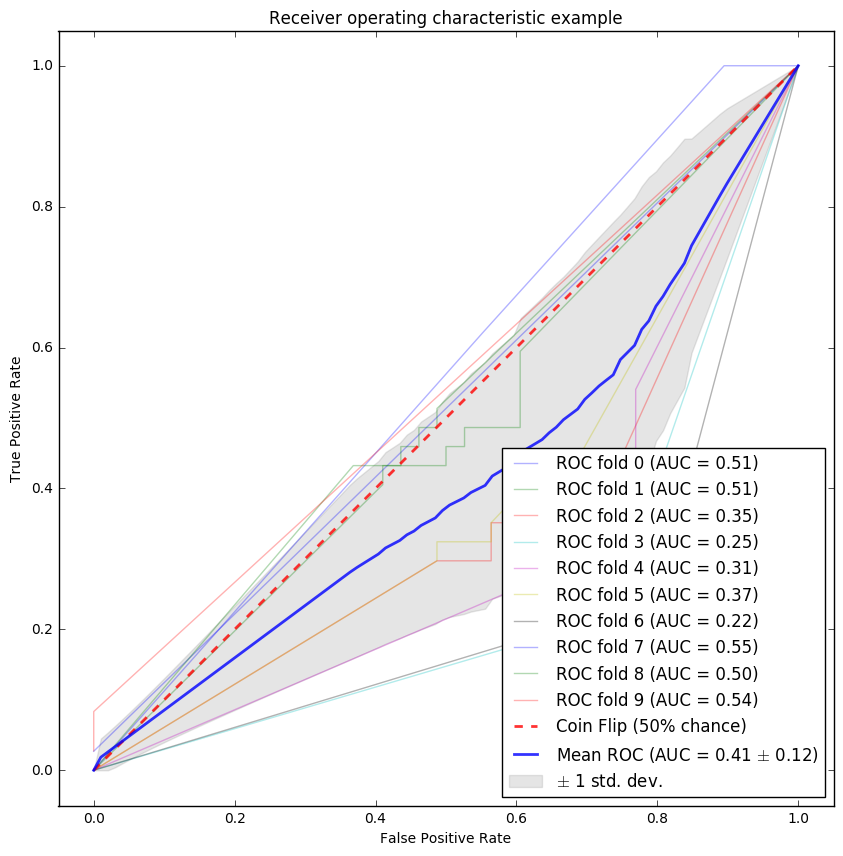

CPU times: user 2h 44min 55s, sys: 39.8 s, total: 2h 45min 35s
Wall time: 25min 27s


In [27]:
%%time

plt.figure(figsize=(10,10))


cv = StratifiedKFold(n_splits=10)
clf = rfc(n_estimators=50, n_jobs=-1)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(traindat, trainlbl):
    probas_ = clf.fit(traindat[train], trainlbl[train]).predict_proba(traindat[test])

    fpr, tpr, thresholds = roc_curve(trainlbl[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Coin Flip (50% chance)', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Linear NN

In [28]:
#import tensorflow as tf

## CNN

In [29]:
#import tensorflow as tf